Добрый день, уважаемые эксперты, в данном блокноте вы найдете решение финального кейса чемпионата Сhallenge_cup команды StatX_ITMO. Последовательно запускайте все блоки кода, необходимые команды импорта модулей в bash также прописаны. Файл итогового ответа будет сформирован в вашем Google Colab, далее вы его сможете скачать на свое устройство, детальный путь к файлу будет описан ниже.
Вам также дан доступ на редактирование данного файла. Просим не злоупотреблять данной фукнцией и не ломать решение)

Однако, это было сделано командой сознательно для экстренных дебагов со стороны экпертов чемпионата, если это потребуется! Надеемся на понимание.

Желаем приятного просмотра и увлекательного погружения в статистические исследования от StatX_ITMO

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';', parse_dates=['service_date'])
data['service_amount_net'] = pd.to_numeric(
    data['service_amount_net'].astype(str).str.replace(',', '.', regex=False).str.replace(' ', '', regex=False),
    errors='coerce'
)

assert data.shape[0] == 1091043

AssertionError: 

**N.B Если на данном этапе у вас возникает исключение!**

Исключение в строке
~~~
data = pd.read_csv('/content/CupIT_Sber_data.csv', sep=';', parse_dates=['service_date'])
~~~
Следующего вида:
~~~
FileNotFoundError: [Errno 2] No such file or directory:
~~~
То просим вас скоректировать строку импорта в кодовом окне и указать корректный путь до тренировочного датасета, в нашем случаем это CupIT_Sber_data.csv

Если возникло исключение:
~~~
----> 9 assert data.shape[0] == 1091043

AssertionError:
~~~
То убидительная просьба проверить корректность загрузки тренировочного датасета CupIT_Sber_data.csv. Возможно, вы загрузили не все данные и стоит еще немного подождать, так как датасет достаточно объемный! Следите за круговой диаграммой готовности загрузки в левом нижнем углу Colab

Если совсем не получается выполнить блок кода без этой ошибки, то вы можете пропустить ее, но StatX_ITMO настоятельно рекомендует не делать это!


In [ ]:
import shutil

(data['service_amount_net'] < 0).sum()
sep = data[data['service_amount_net'] < 0]

print('Было найдено следующее количество отрицательных значений в столбце service_amount_net')
cols = shutil.get_terminal_size().columns
print('─' * cols)
data.shape[0] - (data.shape[0] - sep.shape[0])

Было найдено следующее количество отрицательных значений в столбце service_amount_net
────────────────────────────────────────────────────────────────────────────────────────────────────


7412

Данные строки могут вносить неточность в данные, так как являются возвратами выплат, уберем их из данных совместно с соответствующими им положительными ошибочными выплатами

In [ ]:
(data['service_amount_net'] < 0).sum()
sep = data[data['service_amount_net'] < 0]

# Только положительные и отрицательные
pos = data[data['service_amount_net'] > 0].copy()
neg = data[data['service_amount_net'] < 0].copy()

# Абсолютное значение
pos['abs_amount'] = pos['service_amount_net']
neg['abs_amount'] = neg['service_amount_net'].abs()

# Создаём ключи для merge
merge_cols = ['patient_id', 'service_name', 'abs_amount']

# Пытаемся найти пары (1:1)
merged = pd.merge(pos, neg, on=merge_cols, how='inner', suffixes=('_pos', '_neg'))

merged

,service_document_id_pos,account_document_id_pos,service_date_pos,service_amount_net_pos,patient_id,service_code_pos,service_name,is_hospital_pos,abs_amount,service_document_id_neg,account_document_id_neg,service_date_neg,service_amount_net_neg,service_code_neg,is_hospital_neg
0,0x5AD2935D0767340C85D6081069B2627C,0x8D347FABC64197C49465DAB42E1BB0B3,2022-01-02 14:14:00,5040.0,0x8E3CF8F31ADBBEB20DCCCF53C6320D1C,0xF97373823E47974F94B0E45A13756299,0xA8B82BFCE83DDCF082E9E9C8A249F8D7,0,5040.0,0x5AD2935D0767340C85D6081069B2627C,0x01C537DF90653C553DBF07F2E4A24C26,2022-06-29 09:21:08,-5040.0,0xF97373823E47974F94B0E45A13756299,0
1,0x3FBC80D5A4562CE6A5097063D28D6B23,0x1F64DC1F1DAAE22206DFCE78C45E91A4,2022-01-03 11:46:00,5614.4,0xFCF40DA7CA0A86B94D138AE28E6680A8,0x3CAA49D77487A3A0425A6ADA52536107,0x378898E190A54F9D29A9B9AAE4AAAAA7,0,5614.4,0x3FBC80D5A4562CE6A5097063D28D6B23,0xB08AB65AB9C30F6C664D0EBC0D192319,2022-06-28 17:24:51,-5614.4,0x3CAA49D77487A3A0425A6ADA52536107,0
2,0x1C13154D66DE9856D8A00C209D399FD3,0xAAB1C59F304F9C4E0D9B099308F8654F,2022-01-04 15:22:00,770.0,0x7EBA678D4457A38BE777271BE2BC47BC,0x34644E3FDCAF45433277B2C986DEF714,0x95758EBA87326C4D5DECC8B51A8B9C61,0,770.0,0xB96CD622BECE553B202B17E3533E1BCE,0xCE0A1B140FD444A0FE26F4B9669579CA,2022-06-10 17:25:06,-770.0,0x34644E3FDCAF45433277B2C986DEF714,0
3,0x4C9CDB39C875E04F05FEF3A7640712C7,0x29AEFF0936DC407C41C9D9A4A95D3711,2022-01-05 12:16:00,3423.2,0xC12DE5088EBE1F2ACF1985CDD830DBF6,0x3F94D9EEA6D245F0D16584D23A957949,0x9966C898AC76526FD6EE71F798520689,0,3423.2,0x4C9CDB39C875E04F05FEF3A7640712C7,0xD0BABEAC28312B0C6CFE4ECA3AECF27E,2022-06-28 17:31:28,-3423.2,0x3F94D9EEA6D245F0D16584D23A957949,0
4,0x54E0637E64BE24FBDCA9CA6463CDDFB8,0xC55DC92EEDE24BC6730929038F8E937A,2022-01-05 16:47:00,5313.0,0x328D1DC05C2C0300D29945FD153F0EF0,0x078CE821CA05CF4DD5BCBA5C67100AB1,0xE78880C080D22D588C39E121C78A5E3E,0,5313.0,0x54E0637E64BE24FBDCA9CA6463CDDFB8,0xB8D6742589E0CB9E6EADA20BBE7BD76D,2022-05-24 09:58:59,-5313.0,0x078CE821CA05CF4DD5BCBA5C67100AB1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,0x7139217AB038064B7D7EF0714A0F0AEE,0x2985DB89615BE5E4E79F0D0258799726,2023-12-13 11:43:00,5159.0,0xA13E86C3066698E35019DBCB8C98CD38,0x1380F0C53B2486097E3E47D6F7048F67,0xEF23D2FB2DD422052CDC6AF2E44F0EF7,0,5159.0,0x817EE5D647C0B1133480B1A38C48088F,0x724DCCF4A02E318A51ECDB6D9151BB3F,2022-05-24 10:21:01,-5159.0,0x1380F0C53B2486097E3E47D6F7048F67,0
3357,0x7139217AB038064B7D7EF0714A0F0AEE,0x2985DB89615BE5E4E79F0D0258799726,2023-12-13 11:43:00,5159.0,0xA13E86C3066698E35019DBCB8C98CD38,0x1380F0C53B2486097E3E47D6F7048F67,0xEF23D2FB2DD422052CDC6AF2E44F0EF7,0,5159.0,0x666A657C2416A6704D24816AFECB5582,0xB5BCA6D86A76B541EB208F54F6B1CF67,2022-05-24 10:21:01,-5159.0,0x1380F0C53B2486097E3E47D6F7048F67,0
3358,0x60474FDA370E476C59799489FAF68752,0x6A23D0F6C42E8FCA2FACA9384A397C42,2023-12-14 10:43:00,2233.0,0xF20E7AE420D13DEF638C260E0CB620AF,0x332E8D3220A5317B23558A5E79CE00E4,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2233.0,0x907F3607C3937B36F6EB4E8AAC08DB5C,0x463EAEEF532D115A3E23D1509768488C,2022-05-23 13:51:02,-2233.0,0x42D4FFC90256982594F5F87ECA47AF48,0
3359,0xB064E337066390B90D41F105D3C27E62,0xD0588C750EA3CA5BD025A3DEDAE8DBD7,2023-12-27 10:39:00,4684.8,0x8B40C78EE8A92E30DB68B7D4F7529802,0xF33BFA02FB2193A238CAEDD8E14B4C49,0x95758EBA87326C4D5DECC8B51A8B9C61,0,4684.8,0xDBAB4F0598CBF50D9AC646224948459A,0x38280A2ED069EC59E92F8AA9B96A452C,2023-03-13 10:55:57,-4684.8,0xF33BFA02FB2193A238CAEDD8E14B4C49,1


In [ ]:
# Удалим только первые совпавшие пары (один к одному)
pos_to_drop = merged['service_document_id_pos'].drop_duplicates()
neg_to_drop = merged['service_document_id_neg'].drop_duplicates()

# Удаляем из исходного датафрейма
data_cleaned = data[~data['service_document_id'].isin(pos_to_drop)]
data_cleaned = data_cleaned[~data_cleaned['service_document_id'].isin(neg_to_drop)]

data_cleaned.describe()

,service_date,service_amount_net,is_hospital
count,1087310,1.087310e+06,1.087310e+06
mean,2023-01-11 09:01:11.545166080,2.341056e+03,9.224968e-02
min,2022-01-01 12:07:00,-5.290000e+04,0.000000e+00
25%,2022-07-15 08:38:25.500000,4.240000e+02,0.000000e+00
50%,2023-01-17 11:45:00,1.309600e+03,0.000000e+00
75%,2023-07-11 10:08:45,2.480000e+03,0.000000e+00
max,2023-12-31 18:48:00,1.328586e+06,1.000000e+00
std,NaN,6.469669e+03,2.893782e-01


In [ ]:
print('удалось очистить данные от следующего количества неверных значений')
cols = shutil.get_terminal_size().columns
print('─' * cols)
data.shape[0] - data_cleaned.shape[0]

удалось очистить данные от следующего количества неверных значений
────────────────────────────────────────────────────────────────────────────────────────────────────


3733

Переведем столбец дат в формат pd.datetime

In [ ]:
data_cleaned['service_data'] = data_cleaned['service_date'].apply(pd.to_datetime)
data_cleaned

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital,service_data
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00,1925.00,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022-01-01 12:07:00
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00,4800.00,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0,2022-01-01 12:17:00
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00,1710.00,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0,2022-01-01 12:30:00
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00,2040.00,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0,2022-01-01 12:33:00
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00,2200.00,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0,2022-01-01 12:27:00
...,...,...,...,...,...,...,...,...,...
1091038,0xAF0854F4B12F33F7E708D054EA4C4E39,0x4BA2F4D793766AE703CC498131301D95,2023-12-21 10:57:00,1297.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0x2967289004C10B000F45A9ED3FD42988,0x28D5058F50AAF33F5CFAD39D1F33E733,0,2023-12-21 10:57:00
1091039,0x4B41C55DDC997B70CC37F7BC037BE0FF,0x980634735FC5C16158DC773FBF729F8F,2023-12-21 10:57:00,445.00,0x60932DBC67AD0E50CFCEF91E5A636E67,0xBD46A7B2FCD9FC493D8E2EDBE225C9D1,0x01D029DF0704C6B5891DF7C601181E4D,0,2023-12-21 10:57:00
1091040,0x65AC689ED66DADBE72A979C6C5971666,0x0FBD82C28836C2E8A5FC83939E32CA1D,2023-12-30 09:28:00,9726.00,0x96146D12EDF353CCADC6126BA97E180E,0x7EE918316FD3AEA062AF090BD4535E4C,0xC789986064B7B7656159FFB180390DB9,0,2023-12-30 09:28:00
1091041,0xD5DD4B29D93C2871463BC635FD574355,0xDB4C4A6CBD0B06EEC8DD55F1FF7EEEC3,2023-12-30 09:57:00,1764.00,0x96146D12EDF353CCADC6126BA97E180E,0xDBA2BFA1540877BB3F5969DDDFEBAECF,0x389978FE61E4BDD814604F07FD9E7823,0,2023-12-30 09:57:00


Проверим базовые статистические закономерности

Доказательство того, что есть тренд на рост amount_net

In [ ]:
data_cleaned[data_cleaned['service_data'] > pd.to_datetime('2023-01-01')]['service_amount_net'].mean()

np.float64(2453.1441084254343)

In [ ]:
data_cleaned[data_cleaned['service_data'] < pd.to_datetime('2023-01-01')]['service_amount_net'].mean()

np.float64(2221.907125360969)

Средние значения по годам выросли

In [ ]:
data_cleaned[data_cleaned['is_hospital'] == 1]['service_amount_net'].shape
data_cleaned[data_cleaned['is_hospital'] == 1]['service_amount_net'].mean()

np.float64(3545.540200889297)

In [ ]:
data_cleaned[data_cleaned['is_hospital'] == 0]['service_amount_net'].shape
data_cleaned[data_cleaned['is_hospital'] == 0]['service_amount_net'].mean()

np.float64(2218.6510308447982)

Количество же уникльных клиентов, как и количество выплат вцелом за 2 года схожи

In [ ]:
data_cleaned[data_cleaned['service_data'] < pd.to_datetime('2023-01-01')]['patient_id'].unique().shape

(19672,)

In [ ]:
data_cleaned[data_cleaned['service_data'] > pd.to_datetime('2023-01-01')]['patient_id'].unique().shape

(19815,)

Сгруппируем данные по месчцам и начнем исследования, так как прогноз необходимо предоставить именно по месяцам

In [ ]:
import matplotlib.pyplot as plt

monthly_sum = data_cleaned.groupby(data_cleaned['service_date'].dt.to_period('M'))['service_amount_net'].sum().reset_index()
monthly_sum['service_date'] = monthly_sum['service_date'].dt.to_timestamp()

Построим графики при различной группировки столбца 'service_amount_net'

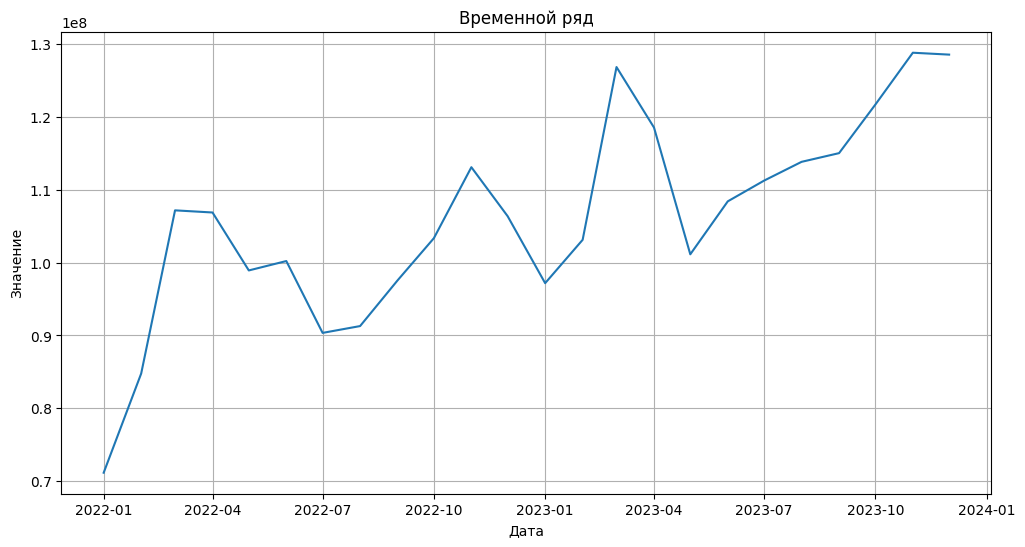

In [ ]:
monthly_sum_M = data_cleaned.groupby(data_cleaned['service_date'].dt.to_period('M'))['service_amount_net'].sum().reset_index()
monthly_sum_M['service_date'] = monthly_sum_M['service_date'].dt.to_timestamp()
monthly_sum_M = monthly_sum_M.set_index('service_date')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_M[['service_amount_net']])
plt.title('Временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

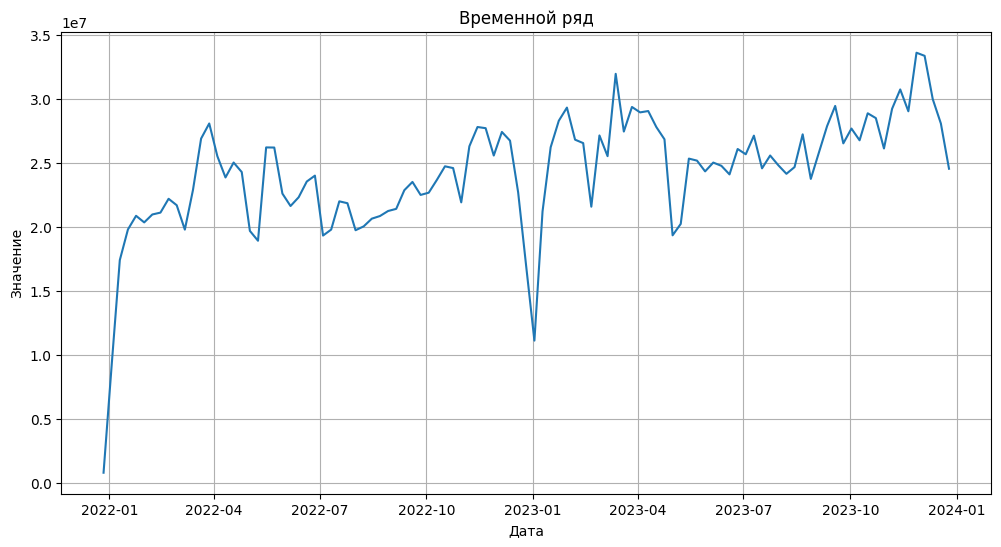

In [ ]:
monthly_sum_W = data_cleaned.groupby(data_cleaned['service_date'].dt.to_period('W'))['service_amount_net'].sum().reset_index()
monthly_sum_W['service_date'] = monthly_sum_W['service_date'].dt.to_timestamp()
monthly_sum_W = monthly_sum_W.set_index('service_date')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_W[['service_amount_net']])
plt.title('Временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

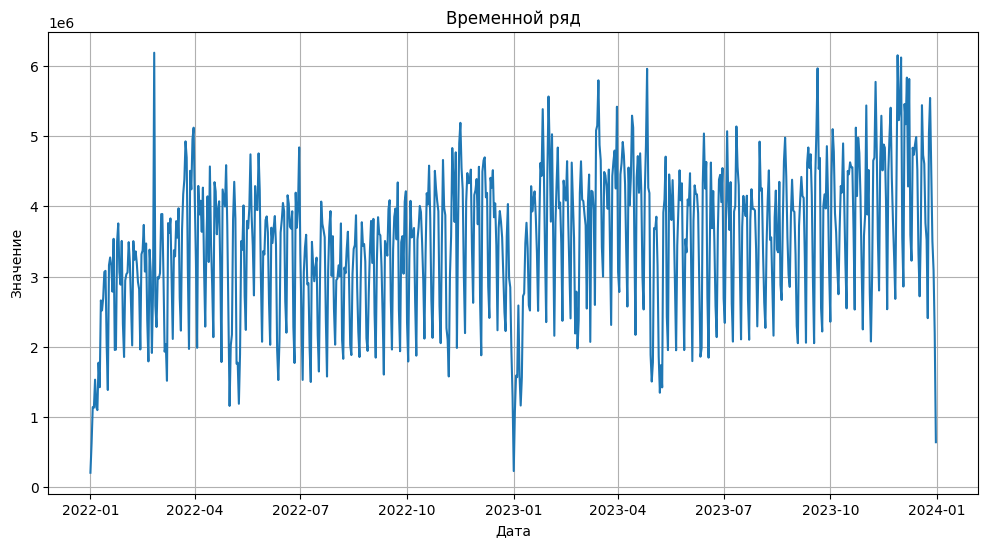

In [ ]:
monthly_sum_D = data_cleaned.groupby(data_cleaned['service_date'].dt.to_period('D'))['service_amount_net'].sum().reset_index()
monthly_sum_D['service_date'] = monthly_sum_D['service_date'].dt.to_timestamp()
monthly_sum_D = monthly_sum_D.set_index('service_date')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_D[['service_amount_net']])
plt.title('Временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

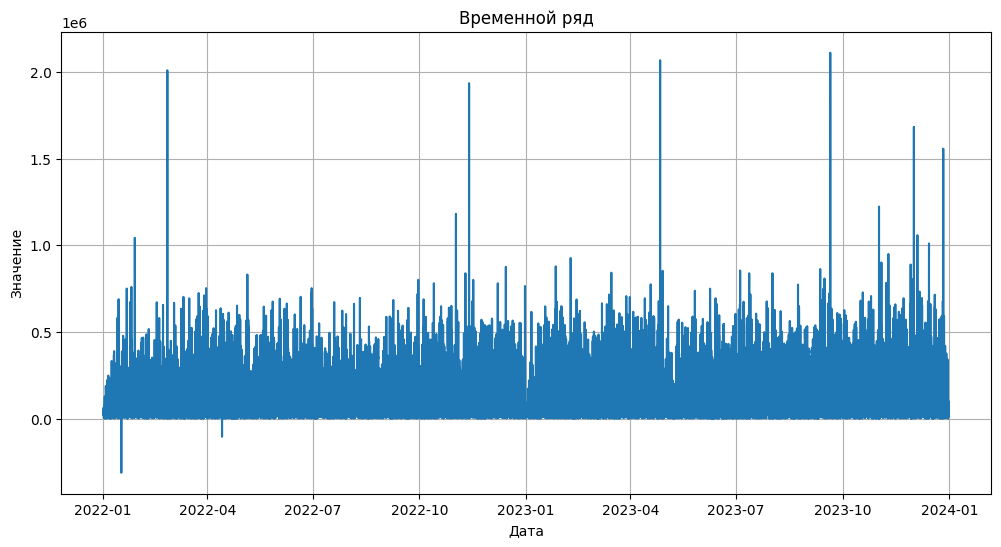

In [ ]:
monthly_sum_H = data_cleaned.groupby(data_cleaned['service_date'].dt.to_period('H'))['service_amount_net'].sum().reset_index()
monthly_sum_H['service_date'] = monthly_sum_H['service_date'].dt.to_timestamp()
monthly_sum_H = monthly_sum_H.set_index('service_date')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sum_H[['service_amount_net']])
plt.title('Временной ряд')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [ ]:
monthly_sum

,service_date,service_amount_net
0,2022-01-01,7.114418e+07
1,2022-02-01,8.475775e+07
2,2022-03-01,1.071703e+08
3,2022-04-01,1.068750e+08
4,2022-05-01,9.891951e+07
5,2022-06-01,1.002083e+08
6,2022-07-01,9.034403e+07
7,2022-08-01,9.128035e+07
8,2022-09-01,9.755931e+07
9,2022-10-01,1.033461e+08


Определим статичен ли представленный временной ряд сгруппированыый по месяцам

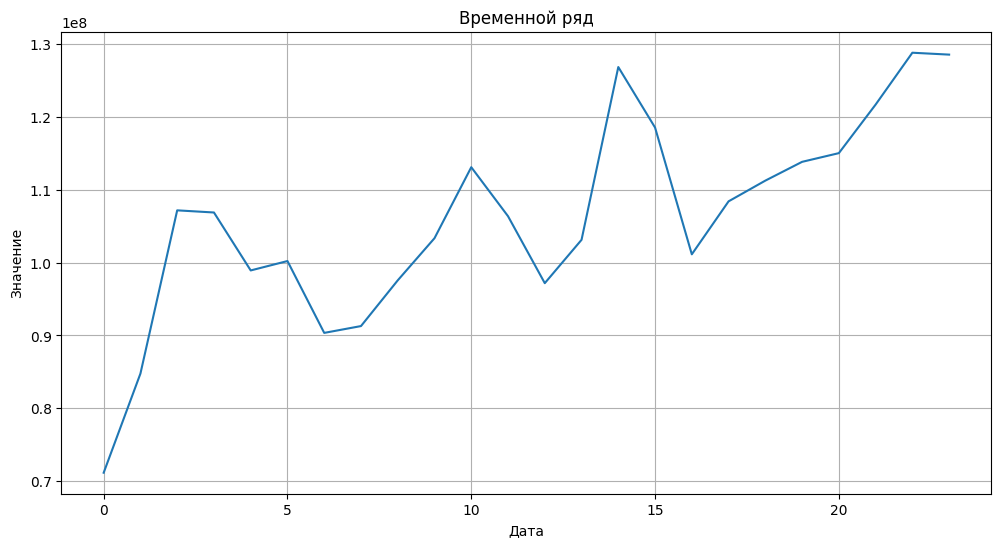

ADF Statistic: -0.627
p-value: 0.8648184003001208
Критические значения:
   1%: -3.788
   5%: -3.013
   10%: -2.646

Ряд НЕ СТАЦИОНАРЕН (не отвергаем H0 при alpha=0.05)


In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller

def check_adfuller_stationarity(df, date_col='service_date', value_col='service_amount_net', alpha=0.05):
    """
    Проверяет стационарность временного ряда.

    Параметры:
    - df: DataFrame с данными
    - date_col: название столбца с датами
    - value_col: название столбца со значениями
    - alpha: уровень значимости (по умолчанию 0.05)

    Возвращает:
    - Вывод о стационарности
    - График ряда
    - Результаты теста Дики-Фуллера
    """

    #df[date_col] = pd.to_datetime(df[date_col])
    #df = df.sort_values(date_col).set_index(date_col)

    plt.figure(figsize=(12, 6))
    plt.plot(df[value_col])
    plt.title('Временной ряд')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()

    result = adfuller(df[value_col].dropna())
    p_value = result[1]

    print(f'ADF Statistic: {result[0]:.3f}')
    print(f'p-value: {p_value}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.3f}')

    if p_value < alpha:
        print(f"\nРяд СТАЦИОНАРЕН (отвергаем H0 при alpha={alpha})")
    else:
        print(f"\nРяд НЕ СТАЦИОНАРЕН (не отвергаем H0 при alpha={alpha})")


check_adfuller_stationarity(monthly_sum)

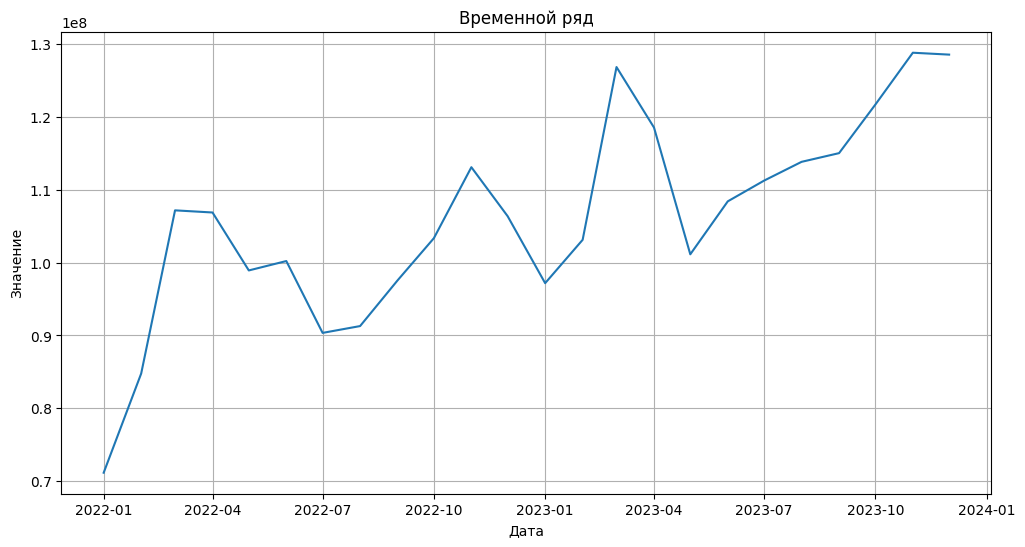

KPSS Statistic: 0.763
p-value: 0.010
Критические значения:
   10%%: 0.347
   5%%: 0.463
   2.5%%: 0.574
   1%%: 0.739

Ряд НЕ СТАЦИОНАРЕН (отвергаем H0 при alpha=0.05)


In [ ]:
from statsmodels.tsa.stattools import kpss

def check_kpss_stationarity(series, alpha=0.05, regression='c'):
    """
    Проверяет стационарность временного ряда с помощью теста KPSS.

    Параметры:
    - series: временной ряд (pd.Series)
    - alpha: уровень значимости (по умолчанию 0.05)
    - regression: тип регрессии в нулевой гипотезе:
      'c' - стационарность вокруг константы (по умолчанию)
      'ct' - стационарность вокруг детерминированного тренда

    Возвращает:
    - Вывод о стационарности
    - График ряда
    - Результаты теста KPSS
    """

    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title('Временной ряд')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.show()

    kpss_stat, p_value, lags, critical_values = kpss(series, regression=regression)

    print(f'KPSS Statistic: {kpss_stat:.3f}')
    print(f'p-value: {p_value:.3f}')
    print('Критические значения:')
    for key, value in critical_values.items():
        print(f'   {key}%: {value:.3f}')

    if p_value < alpha:
        print(f"\nРяд НЕ СТАЦИОНАРЕН (отвергаем H0 при alpha={alpha})")
    else:
        print(f"\nРяд СТАЦИОНАРЕН (не отвергаем H0 при alpha={alpha})")


# data_cleaned_for_kpss = data_cleaned.set_index('service_date')
# check_kpss_stationarity(data_cleaned_for_kpss['service_amount_net'])

data_cleaned_for_kpss = monthly_sum.set_index('service_date')
check_kpss_stationarity(data_cleaned_for_kpss['service_amount_net'])

Тесты ADF и KPSS не противоречат друг другу, выполним также построение графика временного ряда вместе с его скользящим средним и скользящей дисперсией, чтобы убедиться в наличии тренда или сезонности

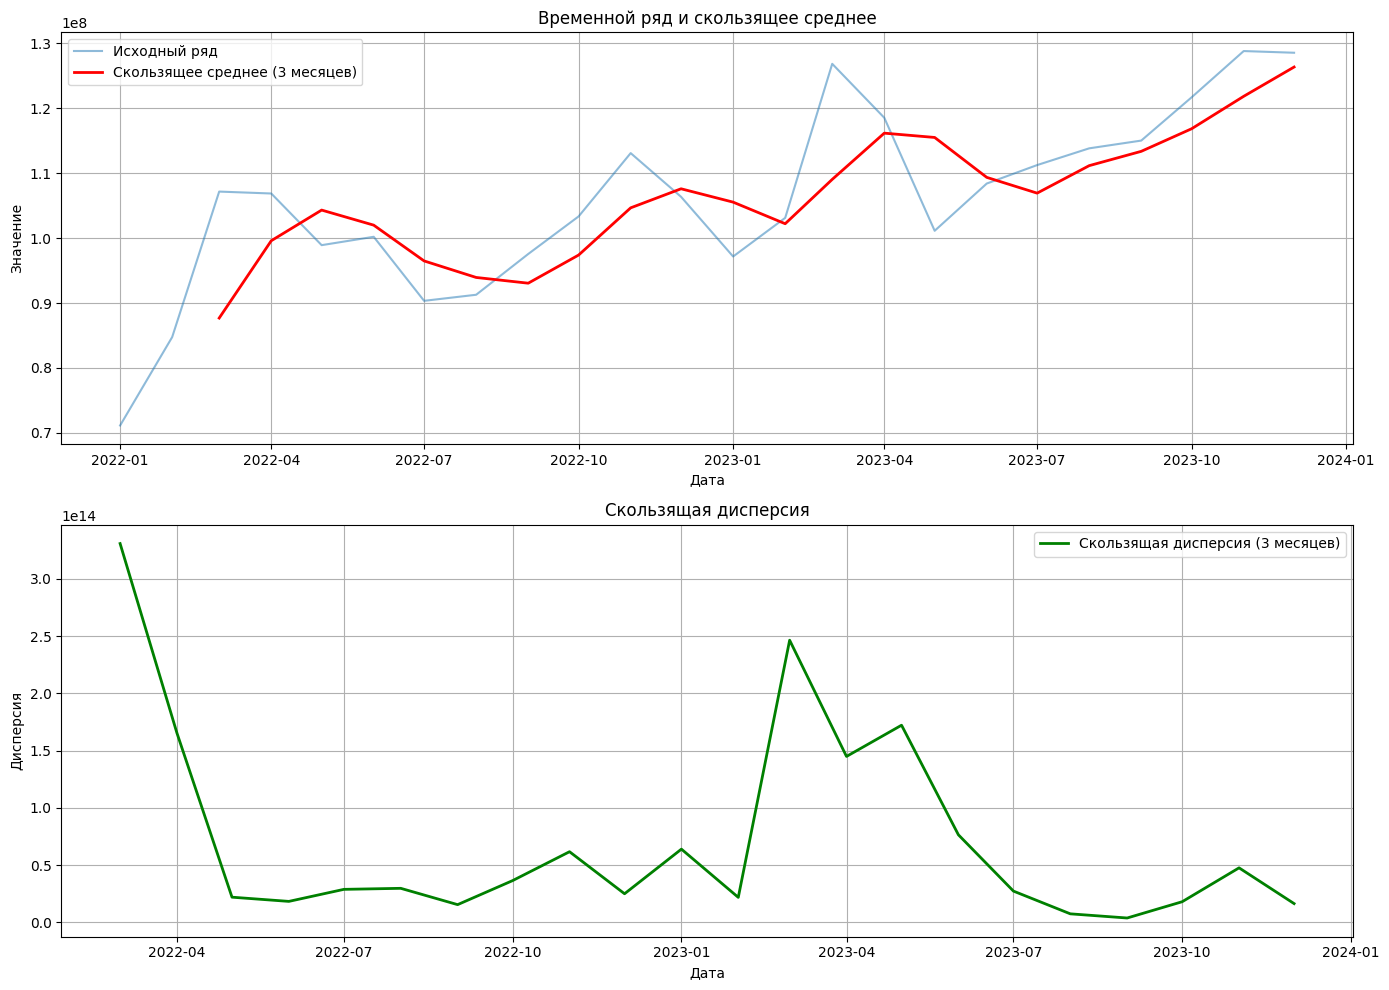

In [ ]:
window_size = 3

ts = data_cleaned_for_kpss

rolling_mean = ts.rolling(window=window_size).mean()
rolling_var = ts.rolling(window=window_size).var()
plt.figure(figsize=(14, 10))

# График 1: Исходный ряд и скользящее среднее
plt.subplot(2, 1, 1)
plt.plot(ts, label='Исходный ряд', alpha=0.5)
plt.plot(rolling_mean, label=f'Скользящее среднее ({window_size} месяцев)', color='red', linewidth=2)
plt.title('Временной ряд и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

# График 2: Скользящая дисперсия
plt.subplot(2, 1, 2)
plt.plot(rolling_var, label=f'Скользящая дисперсия ({window_size} месяцев)', color='green', linewidth=2)
plt.title('Скользящая дисперсия')
plt.xlabel('Дата')
plt.ylabel('Дисперсия')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Исходя из проведенного предварительного анализа можно выделить явный линейный тренд у представленного ряда. Также можно сделать предположение о гетероскедантичности, однако, пока опустим данный момент.

----
Начало статистических экспериментов

В результате предваритлеьного анализа данных командой StatX_ITMO было приянто решение начать статистические испытания с модели SARIMA, так как представленный датасет - это в явном виде временной ряд с определенными параметрами и патернами. В частности с линейным трендом, который модель SARIMA способна работать, так как включает в себя возможность дифиренцирования ряда на этапе обучения. Также стоит отметить, что в целом ряд имеет явный линейный возрастающий паттерн, данный вывод отводит на второй план использование сложных архитектур deep learning (таких как CNN, RNN), классического ML (хотя, конечно, он тут более применим, чем глубокое обучение) а также ансаблевых моделей, также перегруженным и нецелесообранзым решением на первый взгляд выглядит и использование архитектуры Transformers в классической ее интерпритации. Все вышеперечисленные методы крайне сильны и хороши, когда речь идет о нелинейностях в данных, которые сходу не прослеживаются в представленном датасете. Также было обнаружено 2 паттерна, которые можно интерпретировать, как некую сезонность. Если проанализировать зависимость service_amount_net от времени при группировке по месяцам и неделям, то можно увидеть характерные падения в начеле января и начале мая и в 2022 и в 2023 году. Команда проекта связывает данные закономерности с самыми длительными периодами выохдных в России - новогодние и майские праздники. Предположительно, сотрудники Сбера и других организаций, отвечающих за проведения транзакции просто не работают в эти дни. Наличие некой сезонности также является фактором, подталкивающим к выбору именно алгоритма SARIMA для создания прогноза, так как модель содержит сезонные признаки.

Построим первое предсказание ряда, используя модель SARIMA и дефолтные значения сезонных и несезонных парамтером, возьмем их равными 1, показатель диференцирования d = 0 и m = 12 месяцев. Для оценки качества посчитатаем MAE и RMSE прогноза, приняв за ground truth хвоствую часть временного ряда очищенного датасета. Разделение на сренировочную и тестовую выборку будет произвидено в соотношении 80/20  

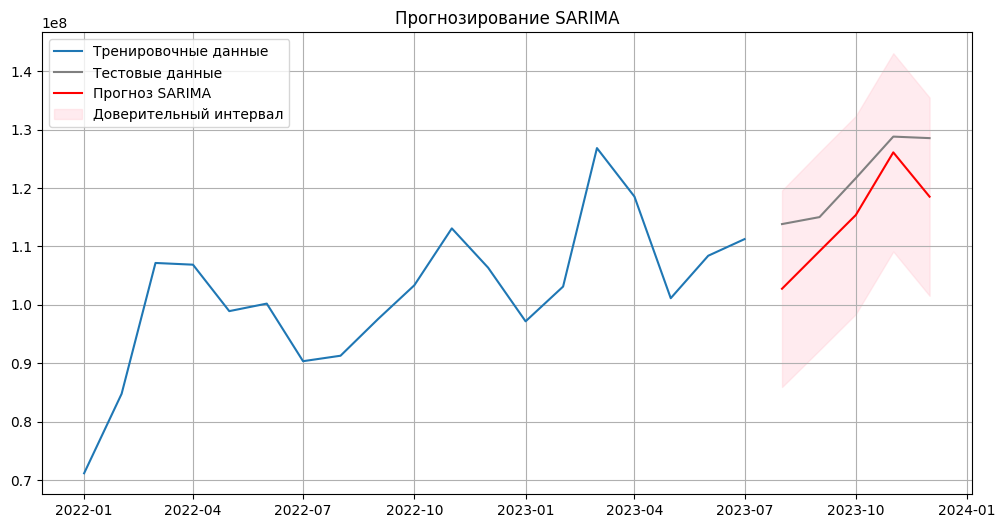

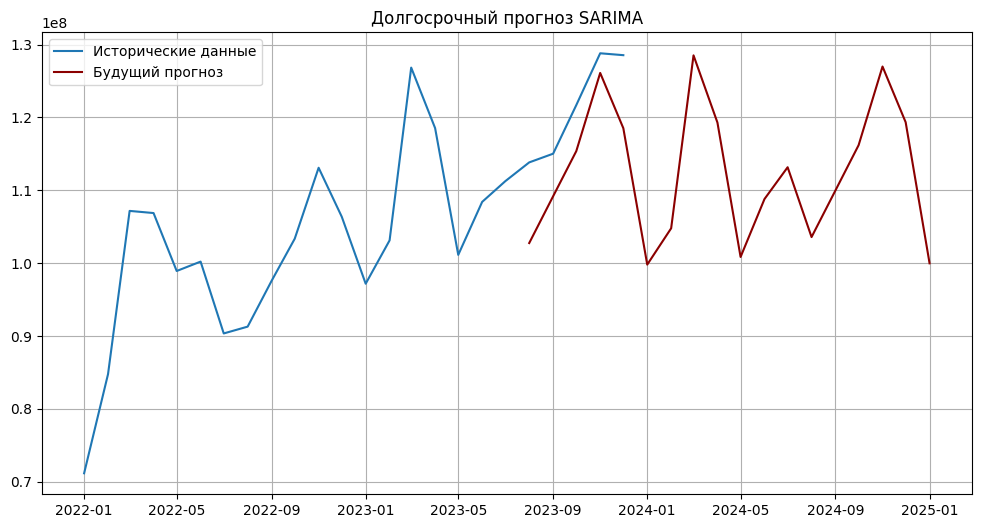


Оценка точности модели
────────────────────────────────────────────────────────────────────────────────────────────────────
MAE: 7193053.78
RMSE: 7804964.24
────────────────────────────────────────────────────────────────────────────────────────────────────


(7193053.777881789, np.float64(7804964.239613729))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


def sarima_pred(data, p=1, d=1, q=1, plot_flag=True, print_flag=True, train_mod=True, test_mod=False):

  if train_mod:
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], data.iloc[train_size:]

  if test_mod:
    train_size = int(len(data) * 0.8)
    train, test = data.iloc[:train_size], 0

  order = (p, d, q)          # Несезонные параметры (p, d, q)
  seasonal_order = (1, 1, 1, 12)  # Сезонные параметры (P, D, Q, m=12 месяцев)

  model_sarimax = SARIMAX(train, order=order, seasonal_order=seasonal_order)
  results_sarimax = model_sarimax.fit(disp=False)

  if train_mod:
    forecast_steps = len(test)
    forecast = results_sarimax.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()

  if test_mod:
    print('Обучение происходит на следующем датасете')
    cols = shutil.get_terminal_size().columns
    print('─' * cols)
    print(train)
    print('─' * cols)
    forecast_steps = 18
    forecast = results_sarimax.get_forecast(steps=forecast_steps)
    forecast_mean = forecast.predicted_mean
    conf_int = forecast.conf_int()



  if plot_flag:
    if train_mod:
      plt.figure(figsize=(12, 6))
      plt.plot(train, label="Тренировочные данные")
      plt.plot(test, label="Тестовые данные", color="gray")
      plt.plot(forecast_mean, label="Прогноз SARIMA", color="red")
      plt.fill_between(
          conf_int.index,
          conf_int.iloc[:, 0],
          conf_int.iloc[:, 1],
          color="pink",
          alpha=0.3,
          label="Доверительный интервал",
      )
      plt.title("Прогнозирование SARIMA")
      plt.legend()
      plt.grid(True)
      plt.show()

  if plot_flag:
    if test_mod:
      plt.figure(figsize=(12, 6))
      plt.plot(train, label="Тренировочные данные")
      #plt.plot(test, label="Тестовые данные", color="gray")
      plt.plot(forecast_mean, label="Прогноз SARIMA", color="red")
      plt.fill_between(
          conf_int.index,
          conf_int.iloc[:, 0],
          conf_int.iloc[:, 1],
          color="pink",
          alpha=0.3,
          label="Доверительный интервал",
      )
      plt.title("Прогнозирование SARIMA")
      plt.legend()
      plt.grid(True)
      plt.show()


  if train_mod:
    mae = mean_absolute_error(test, forecast_mean)
    rmse = np.sqrt(mean_squared_error(test, forecast_mean))

    future_steps = 18  # Прогноз на 1 года вперед
    future_forecast = results_sarimax.get_forecast(steps=future_steps)
    future_mean = future_forecast.predicted_mean

    if plot_flag:
      # Визуализация долгосрочного прогноза
      print('\n')
      plt.figure(figsize=(12, 6))
      plt.plot(ts, label="Исторические данные")
      plt.plot(future_mean, label="Будущий прогноз", color="darkred")
      plt.title("Долгосрочный прогноз SARIMA")
      plt.legend()
      plt.grid(True)
      plt.show()

    if print_flag:
      print('\n', 'Оценка точности модели', sep='')
      cols = shutil.get_terminal_size().columns
      print('─' * cols)
      print(f"MAE: {mae:.2f}")
      print(f"RMSE: {rmse:.2f}")
      print('─' * cols)

    return (mae, rmse)

  if test_mod:
    return results_sarimax

sarima_pred(data_cleaned_for_kpss, p=1, d=0, q=1)

Подберем оптимальные несезонные параметры p, q SARIMA для улучшения точности прогноза. Для этого построим графиик автокорреляции и частичной автокорреляции и найдем оптимальное оптимальное значение лагов.
Однако перед этим продиференцируем функцию, чтобы избавиться от тренда, а затем проверим ряд снова на стационарность.

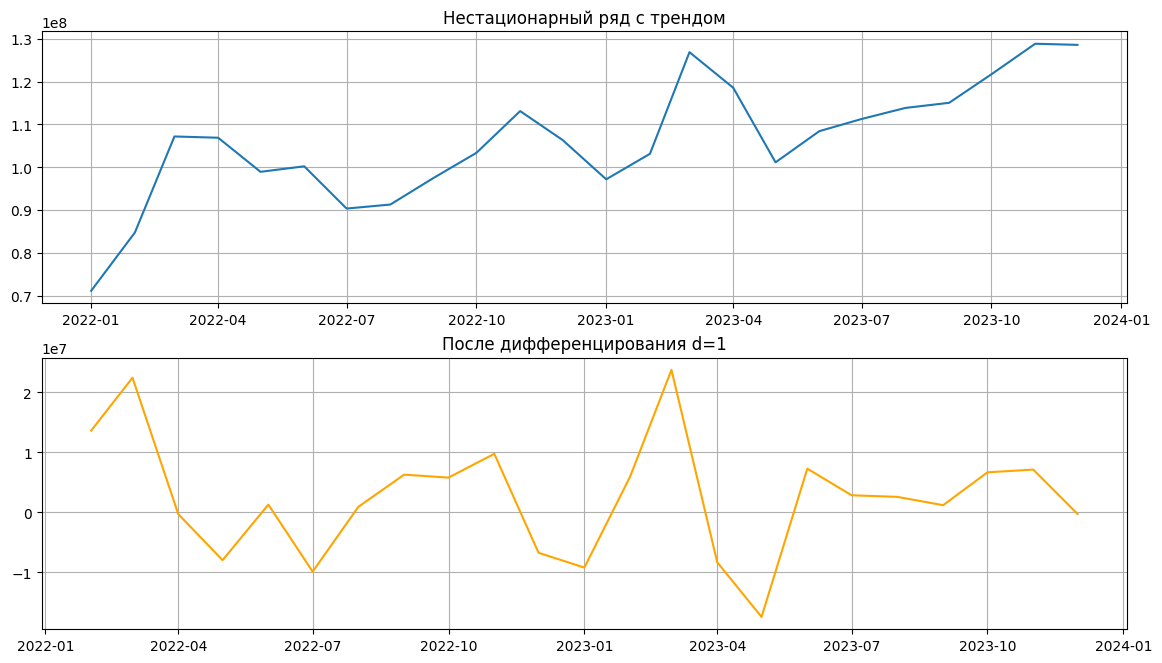

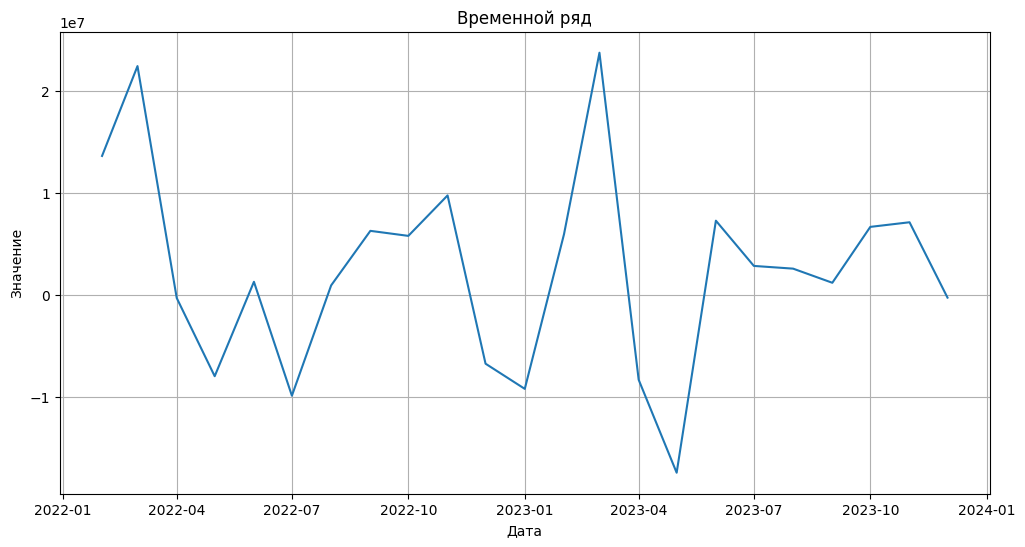

ADF Statistic: -4.721
p-value: 7.6688144751173e-05
Критические значения:
   1%: -4.069
   5%: -3.127
   10%: -2.702

Ряд СТАЦИОНАРЕН (отвергаем H0 при alpha=0.05)


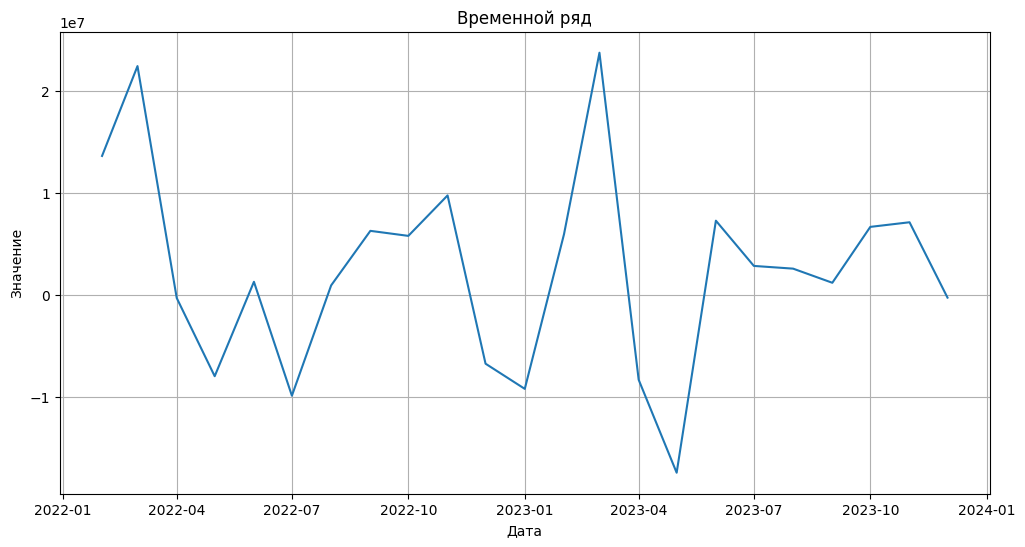

KPSS Statistic: 0.288
p-value: 0.100
Критические значения:
   10%%: 0.347
   5%%: 0.463
   2.5%%: 0.574
   1%%: 0.739

Ряд СТАЦИОНАРЕН (не отвергаем H0 при alpha=0.05)


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts_diff1 = data_cleaned_for_kpss.diff(periods=1).dropna()

# 3. Применяем дифференцирование второго порядка (d=2)
ts_diff2 = ts_diff1.diff(periods=1).dropna()

# 4. Визуализация
plt.figure(figsize=(14, 12))

# Исходный ряд
plt.subplot(3, 1, 1)
plt.plot(data_cleaned_for_kpss, label="Исходный ряд")
plt.title("Нестационарный ряд с трендом")
plt.grid(True)

# Первый порядок дифференцирования
plt.subplot(3, 1, 2)
plt.plot(ts_diff1, label="1-й порядок (d=1)", color="orange")
plt.title("После дифференцирования d=1")
plt.grid(True)

check_adfuller_stationarity(ts_diff1)
check_kpss_stationarity(ts_diff1)

----
Ряд стационарен, теперь построим графики ACF и PACF для продиференцированного ряда и подберем оптимальные параматеры p, q модели SARIMA


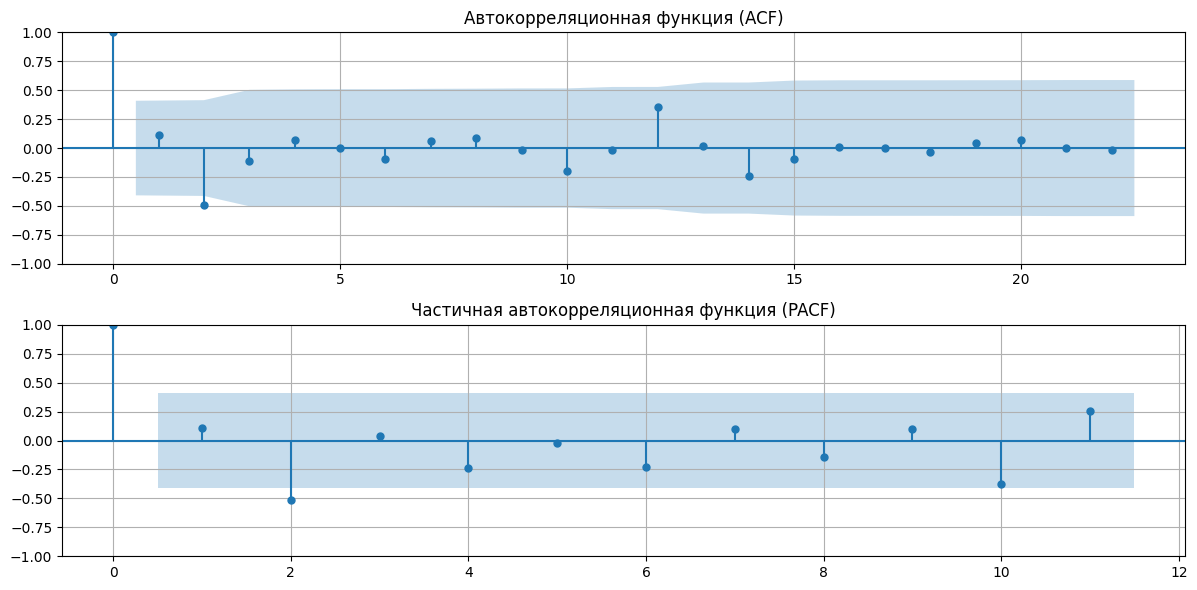

In [ ]:
plt.figure(figsize=(12, 6))

# График ACF
plt.subplot(2, 1, 1)
plot_acf(ts_diff1, lags=(ts_diff1.shape[0] - 1), alpha=0.05, title='Автокорреляционная функция (ACF)', ax=plt.gca())
plt.grid(True)

# График PACF
plt.subplot(2, 1, 2)
plot_pacf(ts_diff1, lags=(ts_diff1.shape[0] // 2), alpha=0.05, title='Частичная автокорреляционная функция (PACF)', ax=plt.gca())
plt.grid(True)

plt.tight_layout()
plt.show()

----
Исходя из графиков можно предположить, что парметры p и q равные 0 являются оптимальными, однако для построения модели стоит явно применить удаление линефного тренда, так как это привело к стационарности исходной зависимости. Попробуем взять p и q равное от 0 до 2, параметр d=1, то есть выполним дополнительно диференцирование первого порядка и оценим точность прогноза SARIMA

In [ ]:
MAE_min = [float('inf'), 0, 0]
RMSE_min = [float('inf'), 0, 0]
for p in range(3):
  for q in range(3):
    sup = sarima_pred(data_cleaned_for_kpss, p=p, q=q, plot_flag=False, print_flag=False)
    if sup[0] < MAE_min[0]:
      MAE_min[0], MAE_min[1], MAE_min[2] = sup[0], p,  q
    if sup[0] < RMSE_min[0]:
      RMSE_min[0], RMSE_min[1], RMSE_min[2] = sup[1], p, q


cols = shutil.get_terminal_size().columns
print('─' * cols)
print(f'Минимальное значение MAE = {MAE_min[0]}, при p = {MAE_min[1]}, q = {MAE_min[2]}')
print(f'Минимальное значение RMSE = {RMSE_min[0]}, при p = {RMSE_min[1]}, q = {RMSE_min[2]}')


────────────────────────────────────────────────────────────────────────────────────────────────────
Минимальное значение MAE = 2106269.4809898646, при p = 0, q = 0
Минимальное значение RMSE = 2284876.6591864377, при p = 0, q = 0


Парамтеры, дающие наименьшее отклонения и MAE и RMSE - p, q = 0, их и будем считать оптимальными. Параметр d оставим равным 1, так как после одного диференцирования предлагаемый ряд становится стационарным, таким образовам деференцирования первого порядка является достаточным для удаления линейного треда, присущего датасету. Теперь построим визуализацию предсказания, используя split датасета на train и test, а затем получим полноценныый прогноз sarima на весь 2024, визуализируем временной ряд и схораним в файл.

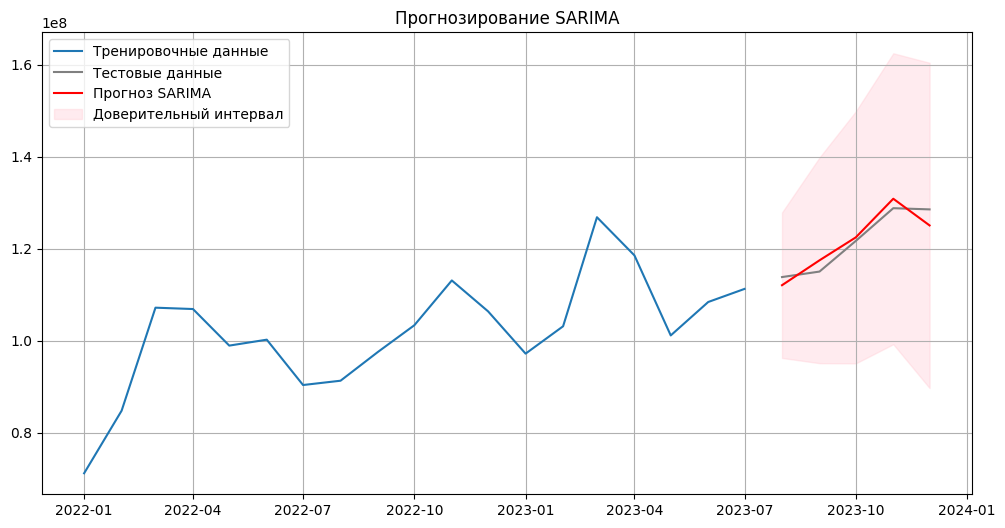

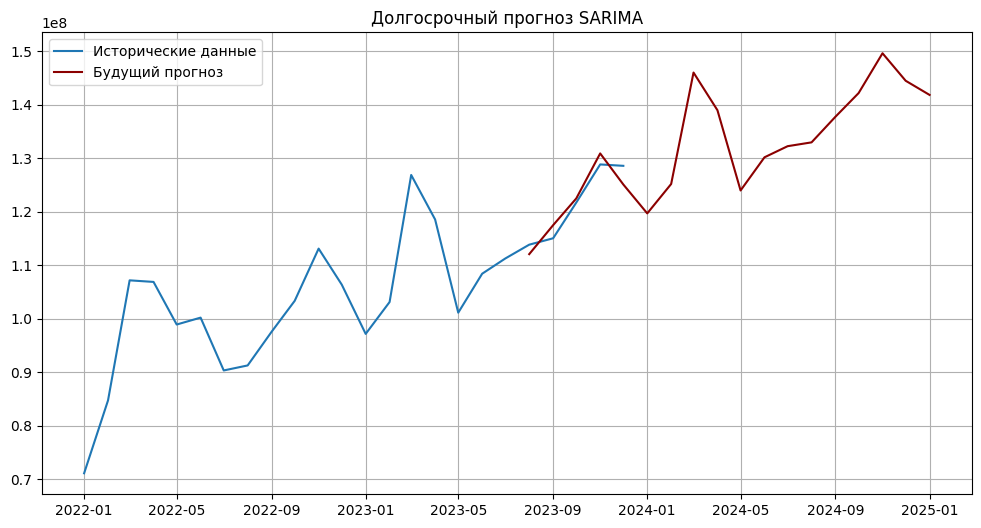


Оценка точности модели
────────────────────────────────────────────────────────────────────────────────────────────────────
MAE: 2106269.48
RMSE: 2284876.66
────────────────────────────────────────────────────────────────────────────────────────────────────


(2106269.4809898646, np.float64(2284876.6591864377))

In [ ]:
sarima_pred(data_cleaned_for_kpss, p=0, d=1, q=0)

Обучаем модель на полном наборе данных за 2022 и 2023 год, "зацепляясь" за последние 5 месяцев данных и делаем предсказание 2024 года и визуализируем.

Обучение происходит на следующем датасете
────────────────────────────────────────────────────────────────────────────────────────────────────
              service_amount_net
service_date                    
2022-01-01          7.114418e+07
2022-02-01          8.475775e+07
2022-03-01          1.071703e+08
2022-04-01          1.068750e+08
2022-05-01          9.891951e+07
2022-06-01          1.002083e+08
2022-07-01          9.034403e+07
2022-08-01          9.128035e+07
2022-09-01          9.755931e+07
2022-10-01          1.033461e+08
2022-11-01          1.130945e+08
2022-12-01          1.063657e+08
2023-01-01          9.717132e+07
2023-02-01          1.031239e+08
2023-03-01          1.268460e+08
2023-04-01          1.185395e+08
2023-05-01          1.011334e+08
2023-06-01          1.084073e+08
2023-07-01          1.112521e+08
────────────────────────────────────────────────────────────────────────────────────────────────────


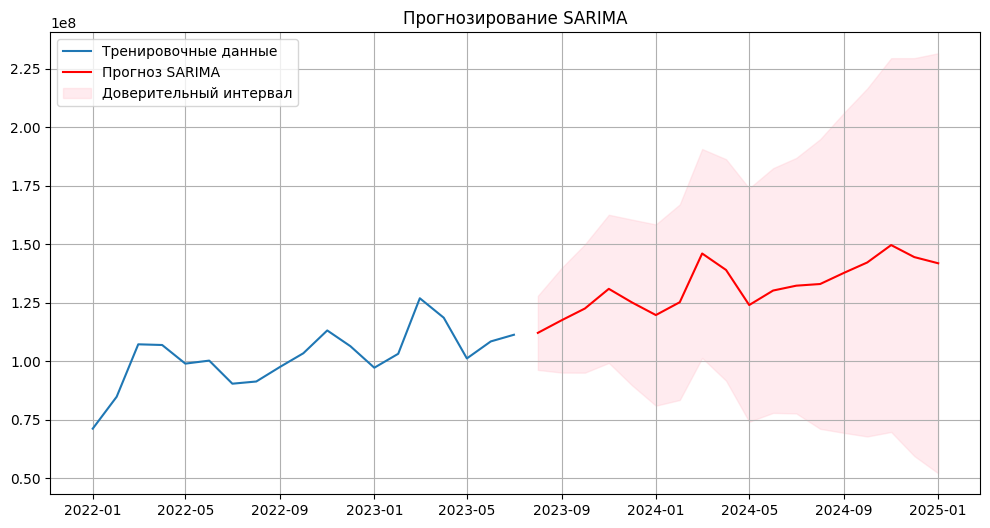

In [ ]:
pred = sarima_pred(data_cleaned_for_kpss, p=0, q=0, train_mod=False, test_mod=True, print_flag=False)
cupit_answer = pred.get_forecast(steps=17).predicted_mean
cupit_answer[5:].to_excel('StatX_ITMO_answer_1.xlsx', index=True)

In [ ]:
cupit_answer = pd.DataFrame(cupit_answer)
cupit_answer['predicted_mean']

,predicted_mean
2023-08-01,1.120594e+08
2023-09-01,1.174734e+08
2023-10-01,1.224631e+08
2023-11-01,1.308686e+08
2023-12-01,1.250667e+08
2024-01-01,1.196716e+08
2024-02-01,1.251603e+08
2024-03-01,1.459690e+08
2024-04-01,1.389353e+08
2024-05-01,1.239509e+08


Построим графики скользящего среднего и скользящей дисперсии для общего временного ряда (исходный + прогноз на 2024 год).

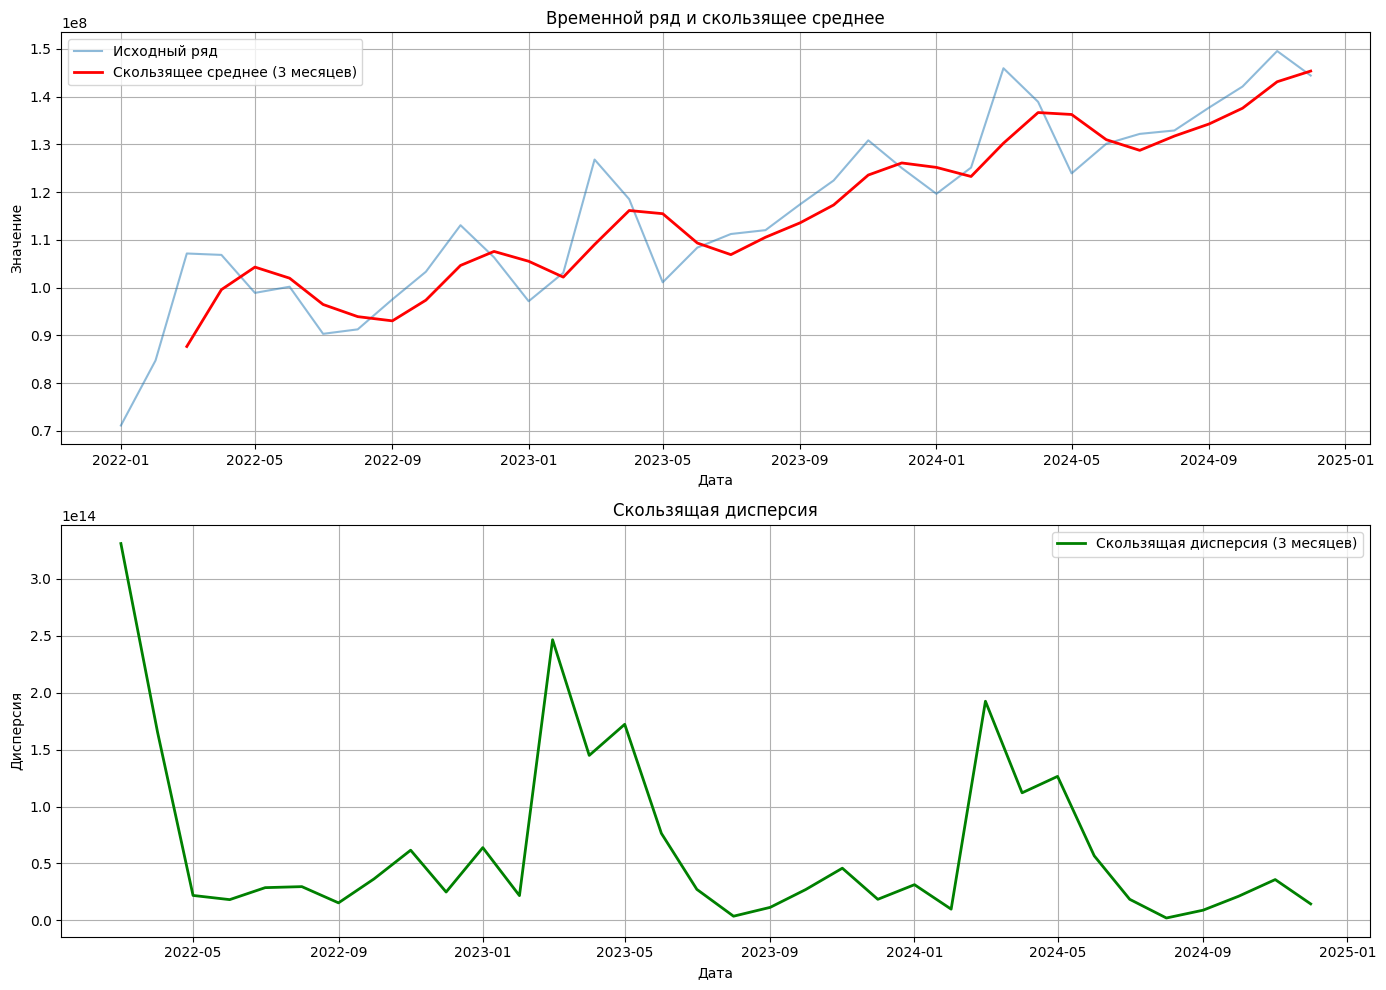

In [ ]:
cupit_answer['service_amount_net'] = cupit_answer['predicted_mean']
result_data = pd.concat([data_cleaned_for_kpss[:19], cupit_answer])
del result_data['predicted_mean']

window_size = 3

ts = result_data

rolling_mean = ts.rolling(window=window_size).mean()
rolling_var = ts.rolling(window=window_size).var()
plt.figure(figsize=(14, 10))

# График 1: Исходный ряд и скользящее среднее
plt.subplot(2, 1, 1)
plt.plot(ts, label='Исходный ряд', alpha=0.5)
plt.plot(rolling_mean, label=f'Скользящее среднее ({window_size} месяцев)', color='red', linewidth=2)
plt.title('Временной ряд и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)

# График 2: Скользящая дисперсия
plt.subplot(2, 1, 2)
plt.plot(rolling_var, label=f'Скользящая дисперсия ({window_size} месяцев)', color='green', linewidth=2)
plt.title('Скользящая дисперсия')
plt.xlabel('Дата')
plt.ylabel('Дисперсия')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

----
Анализируя зависимости можем сдедать вывод, обученная модель не только способна предсказать данные, отличающиеся хорошими мемтриками MAE и RMSE, но и сохранить линейный тредн и сезонность в 2024 году. Комадна StatX_ITMO ставит однозначный лайк данному решению))) !!!


Комадна StatX_ITMO допускает наличие гетероскедастичности временного ряда, то есть непоятонство дисперсии остатков ряда, что может ухудшать прогнозы, создаваемые моделью sarima. Попробуем проанализировать это

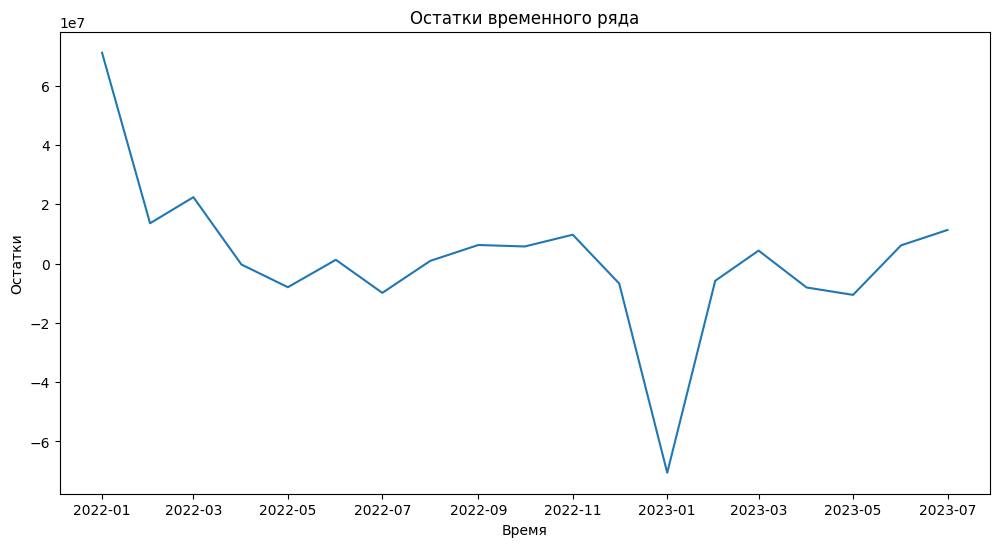

In [ ]:
residuals = pred.resid  # Остатки модели временного ряда
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Остатки временного ряда")
plt.xlabel("Время")
plt.ylabel("Остатки")
plt.show()

Остатки непостоянны, что может указывать на гетероскедастичность.


----
Построем доверительный интервал для полученного прогноза. Это не поможет при сухой оценке решения команды StatX_ITMO и вычислении метрик на основе прогноза в xlsx табице. Однако, в реальных бизнесс кейсах подобные верхние и нижние ограничения могут иметь высокое значение и указывать на границы возможной получаемой прибыли и возможного убытка с определенной точностью доверительного интервала, в нашем случае 95%

In [ ]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.2 MB/s eta 0:00:00


Optimization terminated successfully    (Exit mode 0)
            Current function value: 349.8403330524542
            Iterations: 5
            Function evaluations: 26
            Gradient evaluations: 5
                 date        actual      forecast      lower_95      upper_95
2023-08-01 2023-08-01  1.138307e+08  1.120594e+08  6.783017e+07  1.562886e+08
2023-09-01 2023-09-01  1.150252e+08  1.174734e+08  7.324420e+07  1.617026e+08
2023-10-01 2023-10-01  1.216929e+08  1.224631e+08  7.823384e+07  1.666923e+08
2023-11-01 2023-11-01  1.288133e+08  1.308686e+08  8.663938e+07  1.750978e+08
2023-12-01 2023-12-01  1.285531e+08  1.250667e+08  8.083750e+07  1.692959e+08


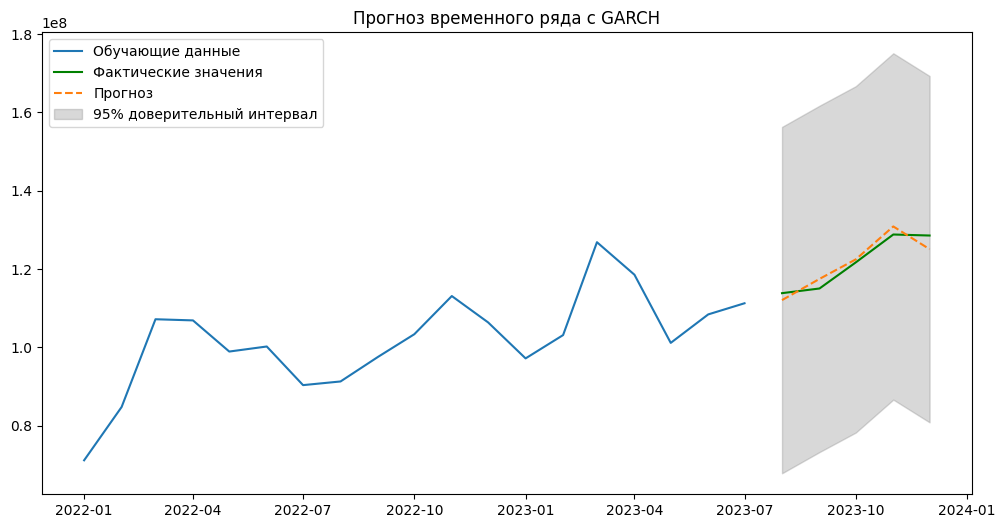

Средняя абсолютная ошибка (MAE): 2106269.48


In [ ]:
from arch import arch_model

train_size = int(len(data_cleaned_for_kpss) * 0.8)
train, test = data_cleaned_for_kpss.iloc[:train_size], data_cleaned_for_kpss.iloc[train_size:]

residuals = pred.resid.dropna()

# Построение GARCH(1,1) для остатков
model_garch = arch_model(residuals, vol='GARCH', p=1, q=1)
result_garch = model_garch.fit(update_freq=0)

# Прогноз волатильности на 5 шагов
garch_forecast = result_garch.forecast(horizon=5)
variance = garch_forecast.variance.iloc[-1].values  # Дисперсия
std_dev = np.sqrt(variance)  # Стандартное отклонение

# Точечный прогноз (среднее значение)
mean_forecast = pred.forecast(steps=5)

# Доверительные интервалы (например, 95%)
conf_interval_lower = mean_forecast - 1.96 * std_dev
conf_interval_upper = mean_forecast + 1.96 * std_dev

# Результаты
forecast_df = pd.DataFrame({
    'date': test.index,
    'actual': test['service_amount_net'],
    'forecast': mean_forecast,
    'lower_95': conf_interval_lower,
    'upper_95': conf_interval_upper
})
print(forecast_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['service_amount_net'], label='Обучающие данные')
plt.plot(test.index, test['service_amount_net'], label='Фактические значения', color='green')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Прогноз', linestyle='--')
plt.fill_between(
    forecast_df['date'],
    forecast_df['lower_95'],
    forecast_df['upper_95'],
    color='gray',
    alpha=0.3,
    label='95% доверительный интервал'
)
plt.title('Прогноз временного ряда с GARCH')
plt.legend()
plt.show()

mae = mean_absolute_error(test['service_amount_net'], forecast_df['forecast'])
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")

----
Попробуем улучшить метрики методом итеративного обучения. Пременим кросс-валидацию и будем последовательно дополнять модель новыми данными, каждый раз добавляя новые батчи в history и вычисляя предсказания итеративно только на один месяц вперед.

In [ ]:
train_size = int(len(data_cleaned_for_kpss) * 0.8)
train, test = data_cleaned_for_kpss.iloc[:train_size], data_cleaned_for_kpss.iloc[train_size:]

predictions = []
history = train["service_amount_net"].tolist()

for t in range(len(test)):
    model = SARIMAX(
        history,
        order=(0, 1, 0),
        seasonal_order=(1, 1, 1, 12)
    )
    model_fit = model.fit(disp=False)
    # Прогноз на следующий период
    yhat = model_fit.forecast(steps=1)
    predictions.append(yhat[0])
    # Добавление реального значения в историю
    history.append(test.iloc[t]["service_amount_net"])

# Оценка точности
rmse = np.sqrt(mean_squared_error(test["service_amount_net"], predictions))
print(f"RMSE: {rmse}")

RMSE: 3307119.3085862654


Как мы видим, подобная тактика не дает прирост, если судить по метрике RMSE, поэтому не будем на нее ориентироваться

----
Альтернативным методом прогнозирования в нашей ситуцации может стать использование RNN - рукурентных нейронных сетей, так как данные архитектуры в своей сути заточены на то, чтобы обращать внимание на прошлые токены в любой последовательности и хранить данные об этих токена в hidden state. При анализе литературы было выялено что lstm могут быть использованы для решения задач по прогназированию временных рядов

Стоит отдельно заметить, что команда StatX ITMO скептически относится к использованию RNN в данной задаче, так как это серьезные повышения вычислительной и алгоритмической сложности решения (хотя время обучения модели все еще остается крайне низким), которые в предоставленных зависимостях не являются оправднными. Дело в том, что lstm действительно хорошо улавливает нелинейные патерны в заисимотях, а подобного рода патернов не наблюдается в исходном датасете. В нем присутствует линейный тренд и некая сезонность (например падения сумм выплат в январе и мае в 2022 и 2023, что может быть связано с двумя самыми длительнымии периодами выходных в году в России), а с линейным трендом и сезонностью могут прекрасно справиться и более простые модели, такике как sarima или linear_regression.


----
Однако для чистоты эксперимента будет обучены модель длинной-короткой памяти или lstm из фрейворка tensorflow. Для обучения будет выбрано окно конекста равное 3, из-за небольшого объема данных при группировки по месяцам. Обучение будет произведено за 100 эпох, так как после данного значения валидационный лосс выходит на плато и становится возможен овер_фиттинг. В качестве функции активации использовалась классическая для RNN 'relu' и оптимизатором был выбран не менее классический 'adam', значение функции ошибки рассчитывалось исходя из MSE.

In [ ]:
!pip install tensorflow

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3569 - val_loss: 0.7503
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.3493 - val_loss: 0.7366
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step - loss: 0.3417 - val_loss: 0.7230
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 0.3342 - val_loss: 0.7097
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step - loss: 0.3268 - val_loss: 0.6964
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 0.3196 - val_loss: 0.6834
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 0.3124 - val_loss: 0.6704
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - loss: 0.3053 - val_loss: 0.6576
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 0.2984 - val_loss: 0.6449
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - loss: 0.2915 - val_loss: 0.6323
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 0.2848 - val_loss: 0.6199
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.2782 

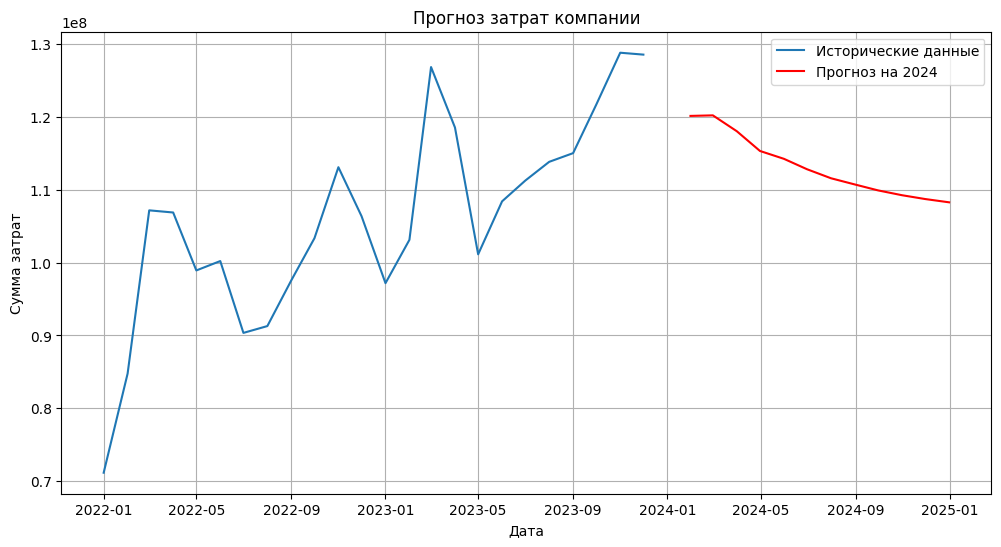

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_cleaned_for_kpss[['service_amount_net']])

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 3
X, y = create_sequences(scaled_data, window_size)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

def forecast_future(model, initial_sequence, steps):
    predictions = []
    current_sequence = initial_sequence.copy()
    for _ in range(steps):
        next_pred = model.predict(current_sequence.reshape(1, window_size, 1))
        predictions.append(next_pred[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred
    return np.array(predictions)

last_sequence = scaled_data[-window_size:]
future_predictions_scaled = forecast_future(model, last_sequence, steps=12)

future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

last_date = data_cleaned_for_kpss.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned_for_kpss.index, data_cleaned_for_kpss['service_amount_net'], label='Исторические данные')
plt.plot(future_dates, future_predictions, label='Прогноз на 2024', color='red')
plt.title('Прогноз затрат компании')
plt.xlabel('Дата')
plt.ylabel('Сумма затрат')
plt.legend()
plt.grid(True)
plt.show()

Можно заметить, что прогнозируемая функция не совсем корректно продолжает исходую зависимость. Команда проекта связывает это с малым количеством тренировочного датасета, при условии группировки по месяцам, для обучения подобного рода модели. В связи с этим окончательным предложенным решением команды StatX_ITMO является алгоритм на основе модели sarima, учитывающей сезонность входных парматеров и позволяющей работать с нестационарность в виде линейного тренда. Модель была обучена единовременным импортом исходного датасета, однако с обрезкой хвоста. То есть обучение проиходило на 80% предлагаемого датасета, дальнейшие 20% известных даннфх и следующий 2024 год прогнозировались в авторегриссионном режиме.
Вариант финального решения в виде файла .xslx, если вы последовательно выполнили все блоки кода, можно найти в вашем Google Colab по данному пути
~~~
/content/StatX_ITMO_answer_1.xlsx
~~~

StatX_ITMO
----
 - Вербицкий Артемий - продакт-менеджер / государь
 - Куприянова Арина - аналитик данных
 - Смелик Пелагея - дизайнер
 - Ишбаев Эрик aka.Магнитогорск-Юниверсити (организаторы сяп за мем мы теперь рофлим) - backend разработчик
 - Михалевич Максим - DS/ML инженер